In [1]:
# Here, I will explore the scenicplus anaylsis results for Zhu et al data.


In [2]:
pwd

'/fast/AG_Bunina/Yusuf/jobs'

In [3]:
cd '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al


In [4]:
pwd

'/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

In [5]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
12_03_24_cell_subsampling_for_topic_modelling.ipynb*
12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb
13_03_24_Exploration_of_topics_and_clustering_and_UMAP.ipynb*
13_03_24_filtering_adata_objects_and_cistopic_object_generation.ipynb*
13_03_24_filtering_of_features_of_7269_cells_based_on_variability.ipynb*
15_03_24_SCENICPLUS_Inferring_candidate_enhancer_regions.ipynb*
17_03_24_ScenicPlus_object_generation_INITIAL_VERSION_w_multiple_commands.ipynb*
17_03_24_ScenicPlus_object_generation.ipynb*
17_03_24_Zhu_et_al_RNA_preprocess.ipynb*
18_03_24_Convert_var_names_to_gene_symbols_in_adata_objects.ipynb*
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
adata_blacklist_filtered.pkl
adata_subset_7269_cells.h5ad
adata_subset_7269_cells.pkl
adata_subset_filtered_by_variability.h5ad
adata_subset_filtered_cells_features.h5ad
bedToBigBed*
cis_object_subset.pkl
cis_object_subset_visualization/
cistopic_commands.ipynb
cistopic_mallet_modelling_er

In [6]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
_stderr = sys.stderr
null = open(os.devnull,'wb')

In [7]:
import dill
scplus_obj = dill.load(open(os.path.join('scenicplus_w_cluster', 'scplus_obj.pkl'), 'rb'))


In [8]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 18452 and n_cells x n_regions = 7053 x 37414
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [9]:
# Simplifying and filtering SCENIC+ output:
# Given the multitude of eRegulons that can be generated for each TF (see above) we will first simplify the result by: 1. Only keeping eRegulons with an extended annotation if there is no direct annotation available (given that the confidence of direct motif annotations is in genral higher). 2. Discarding eRegulons for which the region-to-gene correlation is negative (these are often noisy). 3. Renaming the eRegulons so that eRegulons with the suffix TF_+_+ become TF_+ and those with TF_-_+ become TF_-.

In [10]:
from scenicplus.preprocessing.filtering import apply_std_filtering_to_eRegulons
apply_std_filtering_to_eRegulons(scplus_obj)

Only keeping positive R2G
Only keep extended if not direct
Getting signatures...
Simplifying eRegulons ...


In [11]:
# This will create two new entries in the scenicplus object: 
# scplus_obj.uns['eRegulon_metadata_filtered'] 
# and scplus_obj.uns['eRegulon_signatures_filtered'] 
# containing the simplified results. We will use 
# these for downstream analysis.

In [12]:
scplus_obj.uns['eRegulon_metadata_filtered']

Region_signature_name     Gene_signature_name     TF is_extended  \
0             ARX_+_(105r)             ARX_+_(58g)    ARX       False   
1             ARX_+_(105r)             ARX_+_(58g)    ARX       False   
2             ARX_+_(105r)             ARX_+_(58g)    ARX       False   
3             ARX_+_(105r)             ARX_+_(58g)    ARX       False   
4             ARX_+_(105r)             ARX_+_(58g)    ARX       False   
..                     ...                     ...    ...         ...   
6   TBX18_extended_-_(11r)  TBX18_extended_-_(11g)  TBX18        True   
7   TBX18_extended_-_(11r)  TBX18_extended_-_(11g)  TBX18        True   
8   TBX18_extended_-_(11r)  TBX18_extended_-_(11g)  TBX18        True   
9   TBX18_extended_-_(11r)  TBX18_extended_-_(11g)  TBX18        True   
10  TBX18_extended_-_(11r)  TBX18_extended_-_(11g)  TBX18        True   

                       Region    Gene  R2G_importance   R2G_rho  \
0     chr19:30564287-30565067  ZNF536        0.053467  0.527850   
1     chr19:30449719-30450600  ZNF536        0.022287  0.299415   
2     chr19:30373600-30373950  ZNF536        0.041273  0.540629   
3     chr19:30371016-30371496  ZNF536        0.042117  0.555729   
4     chr19:30374369-30375645  ZNF536        0.090908  0.502897   
..                        ...     ...             ...       ...   
6    chr7:108408289-108409492   NRCAM        0.102682  0.203577   
7   chr11:113013887-113015189   NCAM1        0.053898  0.230033   
8    chr2:162746384-162747628   KCNH7        0.265607  0.544176   
9       chr18:4196084-4196618  DLGAP1        0.060225  0.530696   
10       chr3:8863809-8865176  SRGAP3        0.033936  0.140194   

    R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0               0.028223                  0.028223         0.314246   
1               0.006673                  0.006673         0.314246   
2               0.022313                  0.022313         0.314246   
3               0.023406                  0.023406         0.314246   
4               0.045718                  0.045718         0.314246   
..                   ...                       ...              ...   
6               0.020904                  0.020904         2.331028   
7               0.012398                  0.012398         3.989236   
8               0.144537                  0.144537         0.297349   
9               0.031961                  0.031961         1.788452   
10              0.004758                  0.004758         0.316299   

    TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                 1  0.188565                   0.059256   
1                 1  0.188565                   0.059256   
2                 1  0.188565                   0.059256   
3                 1  0.188565                   0.059256   
4                 1  0.188565                   0.059256   
..              ...       ...                        ...   
6                -1 -0.219389                  -0.511402   
7                -1 -0.329014                  -1.312513   
8                -1 -0.231910                  -0.068958   
9                -1 -0.345166                  -0.617312   
10               -1 -0.196383                  -0.062116   

    TF2G_importance_x_rho Consensus_name  
0                0.059256        ARX_+_+  
1                0.059256        ARX_+_+  
2                0.059256        ARX_+_+  
3                0.059256        ARX_+_+  
4                0.059256        ARX_+_+  
..                    ...            ...  
6                0.511402      TBX18_-_+  
7                1.312513      TBX18_-_+  
8                0.068958      TBX18_-_+  
9                0.617312      TBX18_-_+  
10               0.062116      TBX18_-_+  

[27224 rows x 16 columns]

In [13]:
scplus_obj.uns['eRegulon_signatures_filtered']

{'Gene_based': {'OLIG1_+_(65g)': ['TSEN15',
   'KCNH5',
   'USP43',
   'CSMD1',
   'UST',
   'BMP7',
   'KCNH8',
   'XYLT1',
   'COL20A1',
   'PHACTR3',
   'CNTNAP5',
   'GRIK2',
   'GSG1L',
   'DSCAM',
   'PDE4B',
   'KCNA1',
   'ASTN2',
   'KCNF1',
   'LRRC4C',
   'CA10',
   'PIK3R1',
   'LYPD1',
   'SHC3',
   'IGSF21',
   'PMP2',
   'DPP6',
   'LIMA1',
   'SORCS3',
   'PTPRZ1',
   'NCKAP5',
   'FOXN2',
   'GRM5',
   'THBS4',
   'SLITRK1',
   'ASIC1',
   'GRM7',
   'MDGA2',
   'NTN1',
   'SEZ6L',
   'FBLN2',
   'BRINP1',
   'IGSF9B',
   'RNF144A',
   'PRKG2',
   'NCAM2',
   'PCMTD2',
   'TMEM38B',
   'OLIG1',
   'OLIG2',
   'SOX6',
   'RHBDL3',
   'OPCML',
   'ATP2C2',
   'DCC',
   'COLGALT2',
   'STK32A',
   'RAB3IP',
   'NXPH1',
   'ITGB8',
   'CTTNBP2',
   'CPEB4',
   'FGF12',
   'MYT1',
   'RIT2',
   'PRKCQ'],
  'RUNX1_+_(116g)': ['STAB1',
   'LY86',
   'LPIN2',
   'CYFIP1',
   'HMOX1',
   'MILR1',
   'TLR7',
   'LAIR1',
   'SP140',
   'ITPR2',
   'CD86',
   'POU2F2',
   'MICOS10

In [14]:
scplus_obj.uns['eRegulon_metadata_filtered'].head()

Region_signature_name Gene_signature_name   TF is_extended  \
0          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
1          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
2          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
3          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
4          ARX_+_(105r)         ARX_+_(58g)  ARX       False   

                    Region    Gene  R2G_importance   R2G_rho  \
0  chr19:30564287-30565067  ZNF536        0.053467  0.527850   
1  chr19:30449719-30450600  ZNF536        0.022287  0.299415   
2  chr19:30373600-30373950  ZNF536        0.041273  0.540629   
3  chr19:30371016-30371496  ZNF536        0.042117  0.555729   
4  chr19:30374369-30375645  ZNF536        0.090908  0.502897   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.028223                  0.028223         0.314246   
1              0.006673                  0.006673         0.314246   
2              0.022313                  0.022313         0.314246   
3              0.023406                  0.023406         0.314246   
4              0.045718                  0.045718         0.314246   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                1  0.188565                   0.059256   
1                1  0.188565                   0.059256   
2                1  0.188565                   0.059256   
3                1  0.188565                   0.059256   
4                1  0.188565                   0.059256   

   TF2G_importance_x_rho Consensus_name  
0               0.059256        ARX_+_+  
1               0.059256        ARX_+_+  
2               0.059256        ARX_+_+  
3               0.059256        ARX_+_+  
4               0.059256        ARX_+_+

In [15]:
# eRegulon enrichment scores:

# We can score the enrichment of eRegulons using the AUCell function. This function takes as input a gene or region based ranking (ranking of genes/regions based on the expression/accessibility per cell) and a list of eRegulons.

# These values were already calculated in the wrapper function but let’s recalculate them using the filtered output.

In [16]:
from scenicplus.eregulon_enrichment import score_eRegulons
region_ranking = dill.load(open(os.path.join('scenicplus_w_cluster', 'region_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
gene_ranking = dill.load(open(os.path.join('scenicplus_w_cluster', 'gene_ranking.pkl'), 'rb')) #load ranking calculated using the wrapper function
score_eRegulons(scplus_obj,
                ranking = region_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type= 'region',
                auc_threshold = 0.05,
                normalize = False,
                n_cpu = 5)
score_eRegulons(scplus_obj,
                gene_ranking,
                eRegulon_signatures_key = 'eRegulon_signatures_filtered',
                key_added = 'eRegulon_AUC_filtered',
                enrichment_type = 'gene',
                auc_threshold = 0.05,
                normalize= False,
                n_cpu = 5)

In [17]:
# Note: During the execution of the scenicplus analysis wrapper function,
# It threw error in the step of generationg UMAP of the eRegulon enrichment scores.

# Here, I will try this again in this post scenic plus analysis tutorial on my scenicplus object.
# eRegulon dimensionality reduction:
    
# Based on the enrichment scores calculated above we can generate dimensionality reductions (e.g. tSNE and UMAP).

# To calculate these dimensionality reductions we use both the regions and gene based enrichment scores.

In [18]:
from scenicplus.dimensionality_reduction import run_eRegulons_tsne, run_eRegulons_umap
run_eRegulons_umap(
    scplus_obj = scplus_obj,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_UMAP', #overwrite previously calculated UMAP
)

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [19]:
run_eRegulons_tsne(
    scplus_obj = scplus_obj,
    auc_key = 'eRegulon_AUC_filtered',
    reduction_name = 'eRegulons_tSNE', #overwrite previously calculated tSNE
)

In [20]:
# IT WORKED !!!!. So it could not generate the UMAP in within the wrapper function but it could do it in the separate implementation of the UMAP function on the eRegulon enrichment scores.

# Let’s visualize the UMAP and tSNE stored respectively in eRegulons_UMAP and eRegulons_tSNE, these are calculated based on the combined region and gene AUC values described above.

# Let’s also add some nice colours by specifying a color_dictionary.

In [21]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 18452 and n_cells x n_regions = 7053 x 37414
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [22]:
scplus_obj.metadata_cell

GEX_author_cell_type GEX_age_group  \
150666_ACTTATGAGGGACTAA-1___cisTopic     Oligodendrocytes     adulthood   
16_TGTAACTCATGAGTTT-1___cisTopic                      IPC   early fetal   
150656_TACCCGGCACTATGGC-1___cisTopic               IN-MGE     adulthood   
16_GTATTGATCTGGCATG-1___cisTopic           EN-fetal-early   early fetal   
16_CACCTGTTCATGTTTC-1___cisTopic                      IPC   early fetal   
...                                                   ...           ...   
150656_GCAAGTGCAATTAGGA-1___cisTopic          Endothelial     adulthood   
11_GCGGATACATTGTCAG-1___cisTopic                      IPC   early fetal   
6007_AGAAACCCAGCTTAAT-1___cisTopic                    OPC   adolescence   
8_GGCTTCAAGAACCTGT-1___cisTopic             EN-fetal-late    late fetal   
11_GAGGACTAGGAACCAA-1___cisTopic                      IPC   early fetal   

                                     GEX_donor_id  GEX_nCount_RNA  \
150666_ACTTATGAGGGACTAA-1___cisTopic       Adult1            2339   
16_TGTAACTCATGAGTTT-1___cisTopic           EaFet1            7998   
150656_TACCCGGCACTATGGC-1___cisTopic       Adult2            3891   
16_GTATTGATCTGGCATG-1___cisTopic           EaFet1            2569   
16_CACCTGTTCATGTTTC-1___cisTopic           EaFet1            3250   
...                                           ...             ...   
150656_GCAAGTGCAATTAGGA-1___cisTopic       Adult2            1729   
11_GCGGATACATTGTCAG-1___cisTopic           EaFet2            2968   
6007_AGAAACCCAGCTTAAT-1___cisTopic          Adol1           10348   
8_GGCTTCAAGAACCTGT-1___cisTopic            LaFet2            1491   
11_GAGGACTAGGAACCAA-1___cisTopic           EaFet2             506   

                                      GEX_nFeature_RNA  GEX_nCount_ATAC  \
150666_ACTTATGAGGGACTAA-1___cisTopic            1261.0           6981.0   
16_TGTAACTCATGAGTTT-1___cisTopic                2982.0           3931.0   
150656_TACCCGGCACTATGGC-1___cisTopic            2265.0          11776.0   
16_GTATTGATCTGGCATG-1___cisTopic                1212.0           1976.0   
16_CACCTGTTCATGTTTC-1___cisTopic                1542.0           3986.0   
...                                                ...              ...   
150656_GCAAGTGCAATTAGGA-1___cisTopic            1148.0           2013.0   
11_GCGGATACATTGTCAG-1___cisTopic                1550.0           2806.0   
6007_AGAAACCCAGCTTAAT-1___cisTopic              3618.0           8425.0   
8_GGCTTCAAGAACCTGT-1___cisTopic                 1036.0            899.0   
11_GAGGACTAGGAACCAA-1___cisTopic                 331.0            973.0   

                                      GEX_nFeature_ATAC  GEX_TSS_percentile  \
150666_ACTTATGAGGGACTAA-1___cisTopic             6017.0                0.47   
16_TGTAACTCATGAGTTT-1___cisTopic                 3404.0                0.23   
150656_TACCCGGCACTATGGC-1___cisTopic             9840.0                0.79   
16_GTATTGATCTGGCATG-1___cisTopic                 1763.0                0.34   
16_CACCTGTTCATGTTTC-1___cisTopic                 3444.0                0.52   
...                                                 ...                 ...   
150656_GCAAGTGCAATTAGGA-1___cisTopic             1866.0                0.15   
11_GCGGATACATTGTCAG-1___cisTopic                 2464.0                0.96   
6007_AGAAACCCAGCTTAAT-1___cisTopic               7384.0                0.65   
8_GGCTTCAAGAACCTGT-1___cisTopic                   876.0                0.67   
11_GAGGACTAGGAACCAA-1___cisTopic                  861.0                0.21   

                                      GEX_nucleosome_signal  GEX_percent_mt  \
150666_ACTTATGAGGGACTAA-1___cisTopic               1.187563        0.059737   
16_TGTAACTCATGAGTTT-1___cisTopic                   0.672075        0.020864   
150656_TACCCGGCACTATGGC-1___cisTopic               0.925006        0.436457   
16_GTATTGATCTGGCATG-1___cisTopic                   0.971741        0.000000   
16_CACCTGTTCATGTTTC-1___cisTopic                   0.949531   

In [23]:
scplus_obj.metadata_cell.GEX_cell_type.value_counts()

glutamatergic neuron                              1458
inhibitory interneuron                             499
caudal ganglionic eminence derived interneuron     494
radial glial cell                                  491
oligodendrocyte precursor cell                     491
oligodendrocyte                                    489
astrocyte                                          488
medial ganglionic eminence derived interneuron     483
pericyte                                           474
endothelial cell                                   472
microglial cell                                    466
neural progenitor cell                             405
vascular associated smooth muscle cell             343
Name: GEX_cell_type, dtype: int64

In [24]:
scplus_obj.metadata_cell.GEX_author_cell_type.value_counts()

IN-fetal            499
EN-fetal-late       496
IN-CGE              494
OPC                 491
RG                  491
Oligodendrocytes    489
Astrocytes          488
EN-fetal-early      485
IN-MGE              483
EN                  477
Pericytes           474
Endothelial         472
Microglia           466
IPC                 405
VSMC                343
Name: GEX_author_cell_type, dtype: int64

In [25]:
scplus_obj.metadata_cell.GEX_celltype.value_counts()

IN-fetal            499
EN-fetal-late       496
IN-CGE              494
OPC                 491
RG                  491
Oligodendrocytes    489
Astrocytes          488
EN-fetal-early      485
IN-MGE              483
EN                  477
Pericytes           474
Endothelial         472
Microglia           466
IPC                 405
VSMC                343
Name: GEX_celltype, dtype: int64

In [26]:
from scenicplus.dimensionality_reduction import plot_metadata_given_ax
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
color_dict = {
    'IN-fetal': "#065143",        # Dark Green
    'EN-fetal-late': "#70B77E",   # Light Green
    'IN-CGE': "#E0A890",          # Light Brown
    'OPC': "#F56476",             # Salmon Pink
    'RG': "#CE1483",              # Magenta
    'Oligodendrocytes': "#053C5E",# Dark Blue
    'Astrocytes': "#38A3A5",      # Turquoise
    'EN-fetal-early': "#80ED99",  # Lighter Green
    'IN-MGE': "#FFD700",          # Gold
    'EN': "#FF00FF",              # Pink
    'Pericytes': "#00FFFF",       # Cyan
    'Endothelial': "#FF4500",     # Orange Red
    'Microglia': "#9400D3",       # Dark Purple
    'IPC': "#FF5733",             # Coral
    'VSMC': "#008080"             # Teal
}



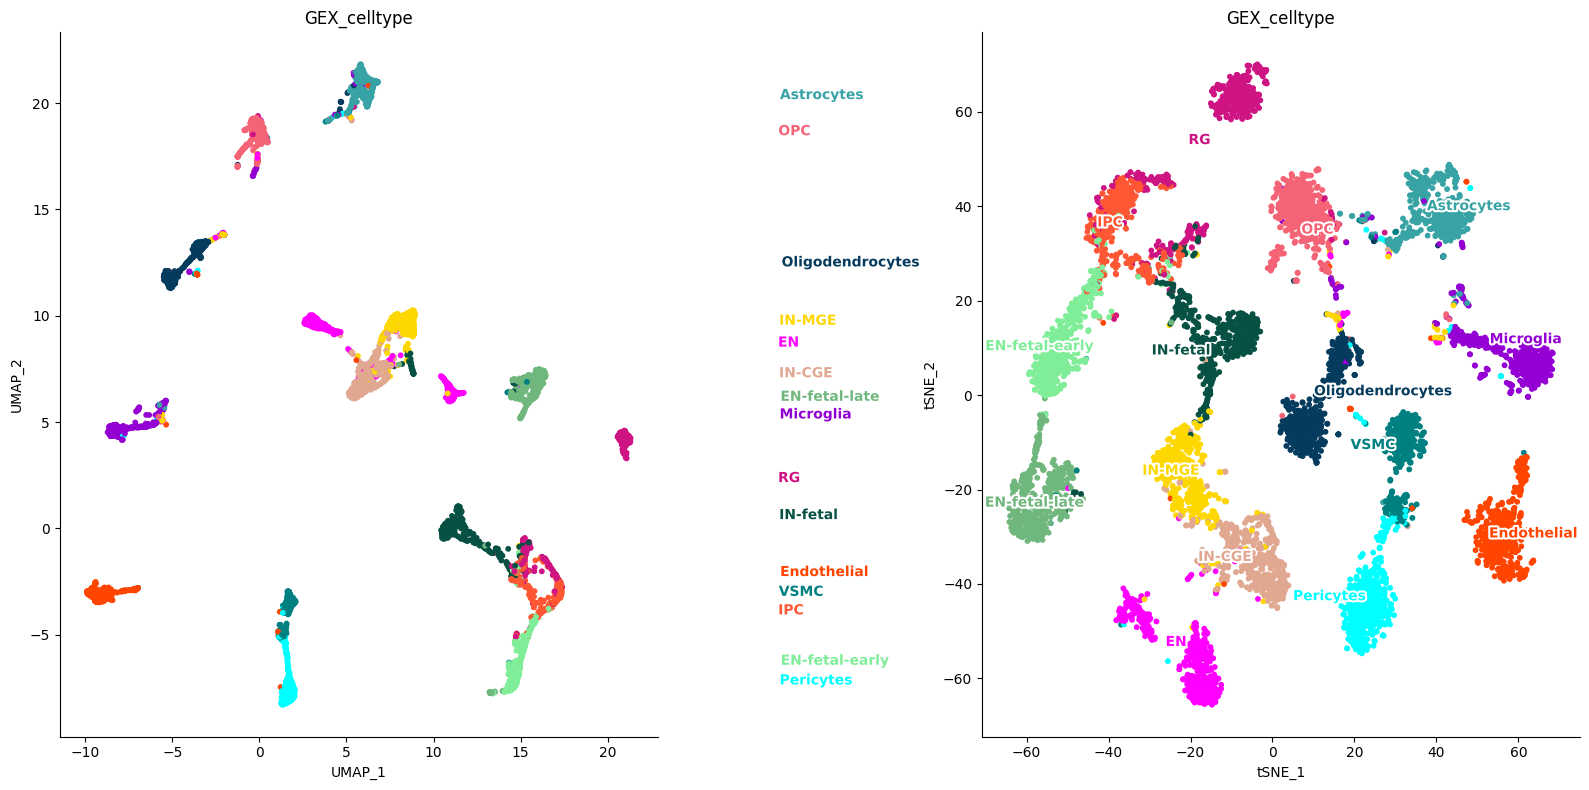

In [28]:
fig, axs = plt.subplots(ncols=2, figsize = (16, 8))
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[0],
    reduction_name = 'eRegulons_UMAP',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
    color_dictionary={'GEX_celltype': color_dict}
)
plot_metadata_given_ax(
    scplus_obj=scplus_obj,
    ax = axs[1],
    reduction_name = 'eRegulons_tSNE',
    variable = 'GEX_celltype', #note the GEX_ prefix, this metadata originated from the gene expression metadata (on which we did the cell type annotation before)
    color_dictionary={'GEX_celltype': color_dict}
)
fig.tight_layout()
sns.despine(ax = axs[0]) #remove top and right edge of axis border
sns.despine(ax = axs[1]) #remove top and right edge of axis border
plt.show()

In [29]:
# Plot the activity / expression of an eRegulon on the dimensionality reduction:
# Next we visualize the gene expression and target gene and region activity of some eRegulons on the tSNE.

In [30]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 7053 x 18452 and n_cells x n_regions = 7053 x 37414
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_genes:'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
	metadata_cell:'GEX_author_cell_type', 'GEX_age_group', 'GEX_donor_id', 'GEX_nCount_RNA', 'GEX_nFeature_RNA', 'GEX_nCount_ATAC', 'GEX_nFeature_ATAC', 'GEX_TSS_percentile', 'GEX_nucleosome_signal', 'GEX_percent_mt', 'GEX_assay_ontology_term_id', 'GEX_cell_type_ontology_term_id', 'GEX_development_stage_ontology_term_id', 'GEX_disease_ontology_term_id', 'GEX_self_reported_ethnicity_ontology_term_id', 'GEX_organism_ontology_term_id', 'GEX_sex_ontology_term_id', 'GEX_tissue_ontology_term_id', 'GEX_suspension_type', 'GEX_is_primary_data', 'GEX_batch', 'GEX_tis

In [31]:
scplus_obj.uns['eRegulon_metadata_filtered'].head(10)

Region_signature_name Gene_signature_name   TF is_extended  \
0          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
1          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
2          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
3          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
4          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
5          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
6          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
7          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
8          ARX_+_(105r)         ARX_+_(58g)  ARX       False   
9          ARX_+_(105r)         ARX_+_(58g)  ARX       False   

                     Region    Gene  R2G_importance   R2G_rho  \
0   chr19:30564287-30565067  ZNF536        0.053467  0.527850   
1   chr19:30449719-30450600  ZNF536        0.022287  0.299415   
2   chr19:30373600-30373950  ZNF536        0.041273  0.540629   
3   chr19:30371016-30371496  ZNF536        0.042117  0.555729   
4   chr19:30374369-30375645  ZNF536        0.090908  0.502897   
5   chr13:45732587-45733841   SIAH3        0.136756  0.263405   
6   chr13:45768432-45769765   SIAH3        0.060548  0.095585   
7  chr2:170823086-170824083    GAD1        0.137817  0.418746   
8    chr9:93037131-93038116    FGD3        0.134064  0.156286   
9    chr9:34577447-34578532   DNAI1        0.062131  0.130956   

   R2G_importance_x_rho  R2G_importance_x_abs_rho  TF2G_importance  \
0              0.028223                  0.028223         0.314246   
1              0.006673                  0.006673         0.314246   
2              0.022313                  0.022313         0.314246   
3              0.023406                  0.023406         0.314246   
4              0.045718                  0.045718         0.314246   
5              0.036022                  0.036022         0.644681   
6              0.005787                  0.005787         0.644681   
7              0.057710                  0.057710         1.308736   
8              0.020952                  0.020952         1.440925   
9              0.008136                  0.008136         0.324643   

   TF2G_regulation  TF2G_rho  TF2G_importance_x_abs_rho  \
0                1  0.188565                   0.059256   
1                1  0.188565                   0.059256   
2                1  0.188565                   0.059256   
3                1  0.188565                   0.059256   
4                1  0.188565                   0.059256   
5                1  0.158864                   0.102417   
6                1  0.158864                   0.102417   
7                1  0.264440                   0.346082   
8                1  0.098687                   0.142200   
9                1  0.069394                   0.022528   

   TF2G_importance_x_rho Consensus_name  
0               0.059256        ARX_+_+  
1               0.059256        ARX_+_+  
2               0.059256        ARX_+_+  
3               0.059256        ARX_+_+  
4               0.059256        ARX_+_+  
5               0.102417        ARX_+_+  
6               0.102417        ARX_+_+  
7               0.346082        ARX_+_+  
8               0.142200        ARX_+_+  
9               0.022528        ARX_+_+

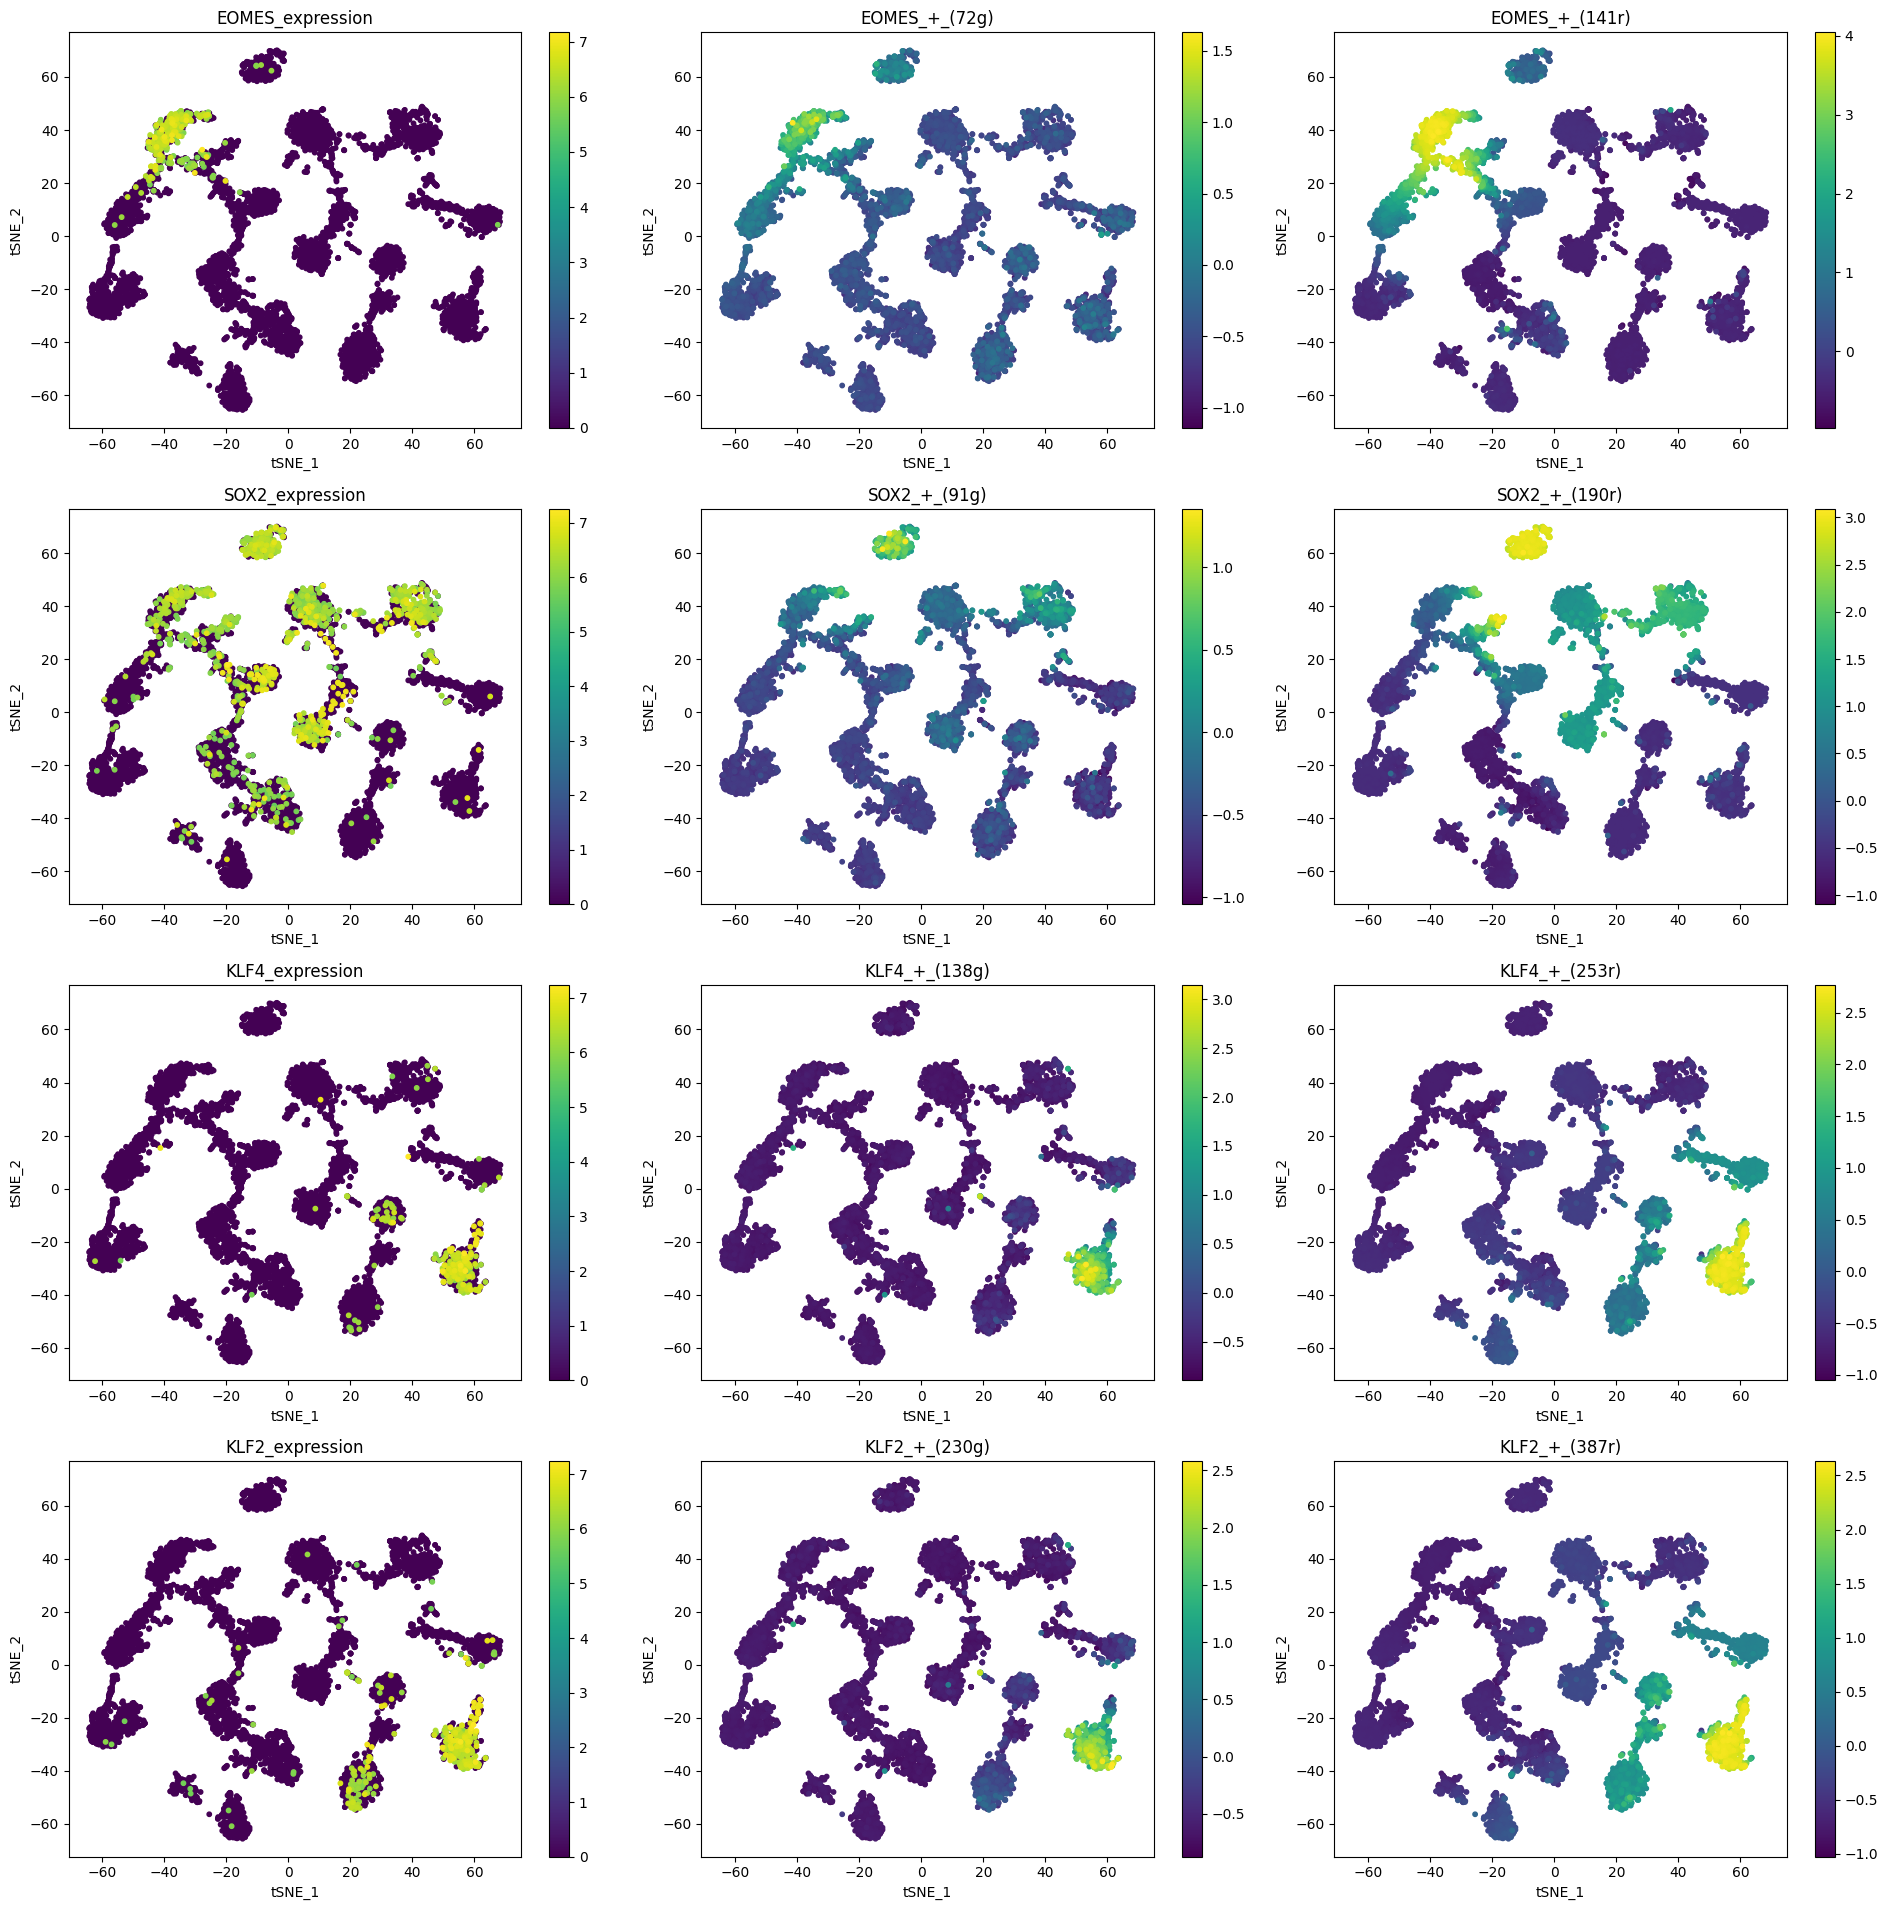

In [32]:
from scenicplus.dimensionality_reduction import plot_eRegulon
plot_eRegulon(
    scplus_obj = scplus_obj,
    reduction_name = 'eRegulons_tSNE',
    selected_regulons = ['EOMES_+', 'SOX2_+', 'KLF4_+', 'KLF2_+'],
    scale = True,
    auc_key = 'eRegulon_AUC_filtered')

In [33]:
# We can also plot only the activity of an eRegulon:

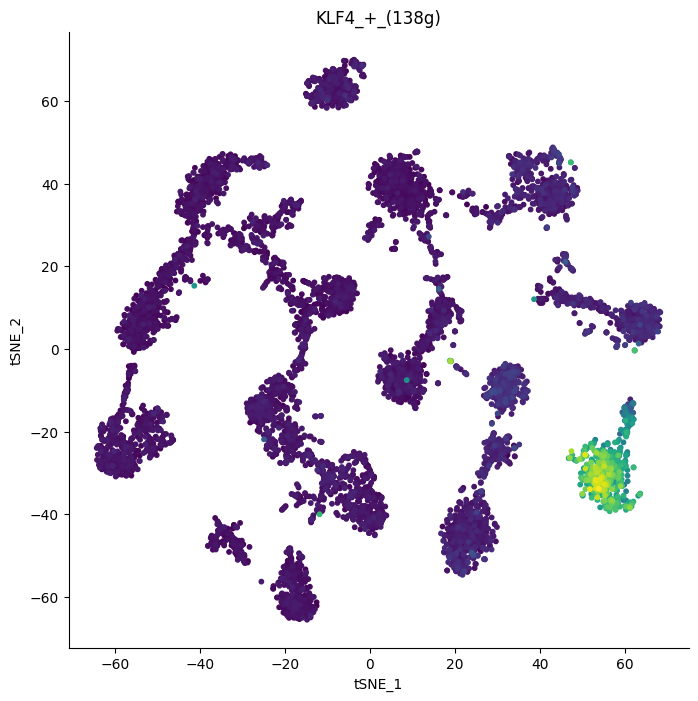

In [34]:
from scenicplus.dimensionality_reduction import plot_AUC_given_ax

fig, ax = plt.subplots(figsize = (8,8))
plot_AUC_given_ax(
    scplus_obj = scplus_obj,
    reduction_name = 'eRegulons_tSNE',
    feature = 'KLF4_+_(138g)',
    ax = ax,
    auc_key = 'eRegulon_AUC_filtered',
    signature_key = 'Gene_based')
sns.despine(ax = ax)
plt.show()

In [35]:
# dotplot-heatmap:

# For eRegulons it is often usefull to visualize both information on the TF/target genes expression and region accessibility at the same time.

# A dotplot-heatmap is a useful way to visualize this. Here the color of the heatmap can be used to visualize one aspect of the eRegulon (for example TF expression) and the size of the dot can be used to visualize another aspect (for example the enrichment (AUC value) of eRegulon target regions).

# Before we plot the the dotplot-heatmap let’s first select some high quality eRegulons to limit the amount of space we need for the plot. One metric which can be used for selecting eRegulons is the correlation between TF expression and target region enrichment scores (AUC values). Let’s (re)calculate this value based on the simplified eRegulons

# We first generate pseudobulk gene expression and region accessibility data, per celltype, to limit the amount of noise for the correlation calculation.

In [36]:
from scenicplus.cistromes import TF_cistrome_correlation, generate_pseudobulks

generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Gene_based')
generate_pseudobulks(
        scplus_obj = scplus_obj,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_key = 'Region_based')

TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'GEX_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Gene_based',
            out_key = 'filtered_gene_based')
TF_cistrome_correlation(
            scplus_obj,
            use_pseudobulk = True,
            variable = 'GEX_celltype',
            auc_key = 'eRegulon_AUC_filtered',
            signature_key = 'Region_based',
            out_key = 'filtered_region_based')

In [37]:
scplus_obj.uns['TF_cistrome_correlation']

{'GEX_author_cell_type_eGRN_gene_based': Empty DataFrame
 Columns: [TF, Cistrome, Rho, P-value, Adjusted_p-value]
 Index: [],
 'GEX_author_cell_type_eGRN_region_based': Empty DataFrame
 Columns: [TF, Cistrome, Rho, P-value, Adjusted_p-value]
 Index: [],
 'filtered_gene_based':          TF         Cistrome       Rho        P-value  Adjusted_p-value
 0     OLIG1    OLIG1_+_(65g)  0.693177  2.818824e-215     5.361293e-215
 1     RUNX1   RUNX1_+_(116g)  0.900272   0.000000e+00      0.000000e+00
 2     NR2E1    NR2E1_+_(28g)  0.635812  1.069881e-170     1.687454e-170
 3       JUN      JUN_+_(32g)  0.828707   0.000000e+00      0.000000e+00
 4      PAX6     PAX6_+_(58g)  0.870441   0.000000e+00      0.000000e+00
 ..      ...              ...       ...            ...               ...
 189  ZNF536   ZNF536_-_(29g) -0.575181  7.566673e-133     1.033757e-132
 190    SOX9    SOX9_+_(259g)  0.858998   0.000000e+00      0.000000e+00
 191    MAFB     MAFB_+_(17g)  0.715574  1.134849e-235     2.50182

In [40]:
# TF_cistrome_correlation function creates an empty data.frame. This is a reported bug.
# Later, I will update my scenicplus package. For now, I will downgrade my pandas module 
# to 1.5 which solves the issue. My current version is 2.0.3.

# I INSTALLED PANDAS 1.5.0 and repeated the above commands and IT WORKED !!!!

In [41]:
scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].head()

TF        Cistrome       Rho        P-value  Adjusted_p-value
0  OLIG1   OLIG1_+_(86r)  0.002844   9.123523e-01      9.123523e-01
1  RUNX1  RUNX1_+_(141r)  0.895847   0.000000e+00      0.000000e+00
2  NR2E1   NR2E1_+_(39r)  0.592381  9.006667e-143     2.496133e-142
3   PAX6   PAX6_+_(110r)  0.856435   0.000000e+00      0.000000e+00
4    JUN     JUN_+_(36r)  0.548305  1.802336e-118     4.212689e-118

In [42]:
# Let’s visualize these correlations in a scatter plot and select eRegulons for which the correlaiton coefficient is above 0.70 or below -0.75.

/tmp/7025253.1.all.q/ipykernel_11720/2840647543.py:12: RuntimeWarning: divide by zero encountered in log10
  sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)


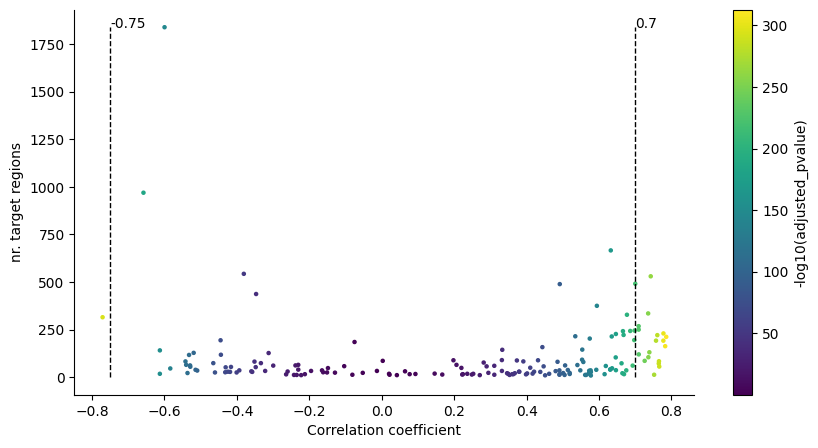

In [43]:
import numpy as np
n_targets = [int(x.split('(')[1].replace('r)', '')) for x in scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Cistrome']]
rho = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'].to_list()
adj_pval = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Adjusted_p-value'].to_list()

thresholds = {
        'rho': [-0.75, 0.70],
        'n_targets': 0
}
import seaborn as sns
fig, ax = plt.subplots(figsize = (10, 5))
sc = ax.scatter(rho, n_targets, c = -np.log10(adj_pval), s = 5)
ax.set_xlabel('Correlation coefficient')
ax.set_ylabel('nr. target regions')
#ax.hlines(y = thresholds['n_targets'], xmin = min(rho), xmax = max(rho), color = 'black', ls = 'dashed', lw = 1)
ax.vlines(x = thresholds['rho'], ymin = 0, ymax = max(n_targets), color = 'black', ls = 'dashed', lw = 1)
ax.text(x = thresholds['rho'][0], y = max(n_targets), s = str(thresholds['rho'][0]))
ax.text(x = thresholds['rho'][1], y = max(n_targets), s = str(thresholds['rho'][1]))
sns.despine(ax = ax)
fig.colorbar(sc, label = '-log10(adjusted_pvalue)', ax = ax)
plt.show()

In [44]:
selected_cistromes = scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based'].loc[
        np.logical_or(
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] > thresholds['rho'][1],
                scplus_obj.uns['TF_cistrome_correlation']['filtered_region_based']['Rho'] < thresholds['rho'][0]
        )]['Cistrome'].to_list()
selected_eRegulons = [x.split('_(')[0] for x in selected_cistromes]
selected_eRegulons_gene_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Gene_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
selected_eRegulons_region_sig = [
        x for x in scplus_obj.uns['eRegulon_signatures_filtered']['Region_based'].keys()
        if x.split('_(')[0] in selected_eRegulons]
#save the results in the scenicplus object
scplus_obj.uns['selected_eRegulon'] = {'Gene_based': selected_eRegulons_gene_sig, 'Region_based': selected_eRegulons_region_sig}
print(f'selected: {len(selected_eRegulons_gene_sig)} eRegulons')

selected: 42 eRegulons


In [45]:
# Let’s save these changes we have made to the scenicplus_obj:

In [47]:
dill.dump(scplus_obj, open(os.path.join('scenicplus_w_cluster', 'scplus_obj_post_analysis.pkl'), 'wb'), protocol=-1)

In [55]:
category_names = scplus_obj.metadata_cell['GEX_celltype'].cat.categories

In [56]:
category_names

Index(['Astrocytes', 'EN', 'EN-fetal-early', 'EN-fetal-late', 'Endothelial',
       'IN-CGE', 'IN-MGE', 'IN-fetal', 'IPC', 'Microglia', 'OPC',
       'Oligodendrocytes', 'Pericytes', 'RG', 'VSMC'],
      dtype='object')

2024-03-24 16:40:26,603 matplotlib.font_manager INFO     Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


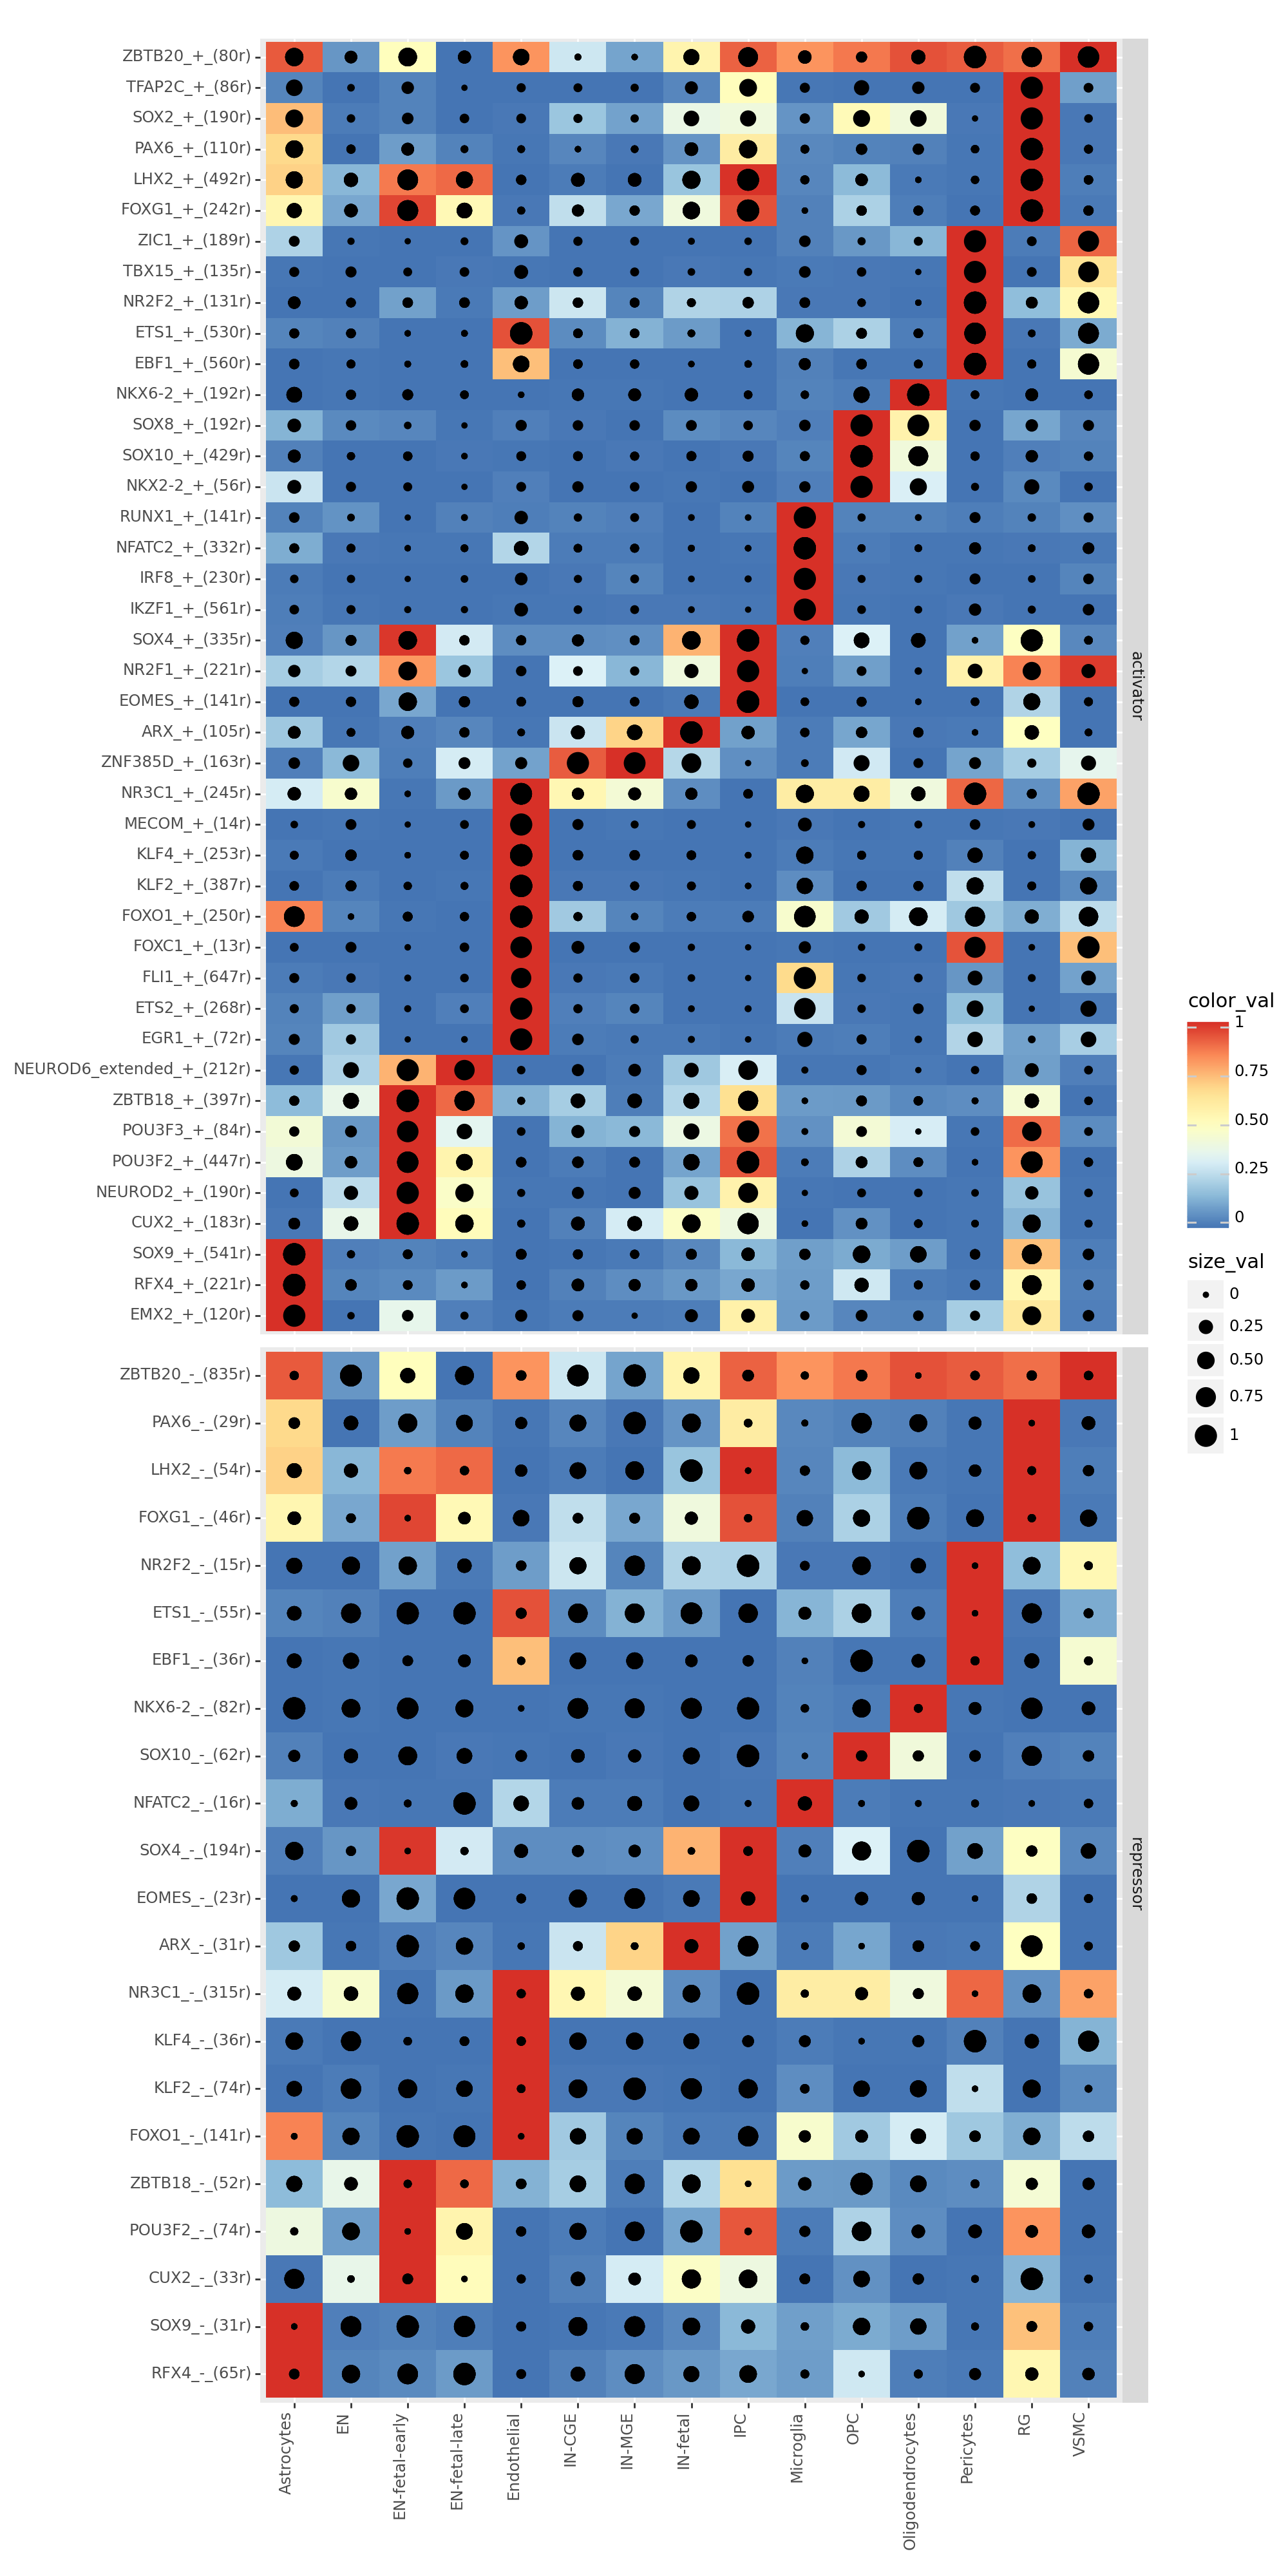

<Figure Size: (1000 x 2000)>

In [60]:
from scenicplus.plotting.dotplot import heatmap_dotplot
heatmap_dotplot(
        scplus_obj = scplus_obj,
        size_matrix = scplus_obj.uns['eRegulon_AUC_filtered']['Region_based'], #specify what to plot as dot sizes, target region enrichment in this case
        color_matrix = scplus_obj.to_df('EXP'), #specify  what to plot as colors, TF expression in this case
        scale_size_matrix = True,
        scale_color_matrix = True,
        group_variable = 'GEX_celltype',
        subset_eRegulons = scplus_obj.uns['selected_eRegulon']['Gene_based'],
        index_order = category_names,
        figsize = (10, 20),
        orientation = 'vertical')

In [61]:
# overlap of predicted target regions: 
# An interesting aspect of gene regulation is transcription factor cooperativity (i.e. multiple TFs cobinding the same enhancer together driving gene expression).

# By looking at the overlap of predicted target regions of TFs we can infer potential cooperativity events.

# Let’s look at the overlap of target regions of the top 5 TFs per cell type based on the Regulon Specificity Score (RSS).

# First we calculate the RSS for the target regions of the selected eRegulons.

In [62]:
from scenicplus.RSS import *
regulon_specificity_scores(
        scplus_obj,
        variable = 'GEX_celltype',
        auc_key = 'eRegulon_AUC_filtered',
        signature_keys = ['Region_based'],
        selected_regulons = [x for x in scplus_obj.uns['selected_eRegulon']['Region_based'] if '-' not in x],
        out_key_suffix = '_filtered')

In [63]:
# Let’s visualize the RSS values using a scatter plot:

AttributeError: FancyArrowPatch.set() got an unexpected keyword argument 'autoalign'

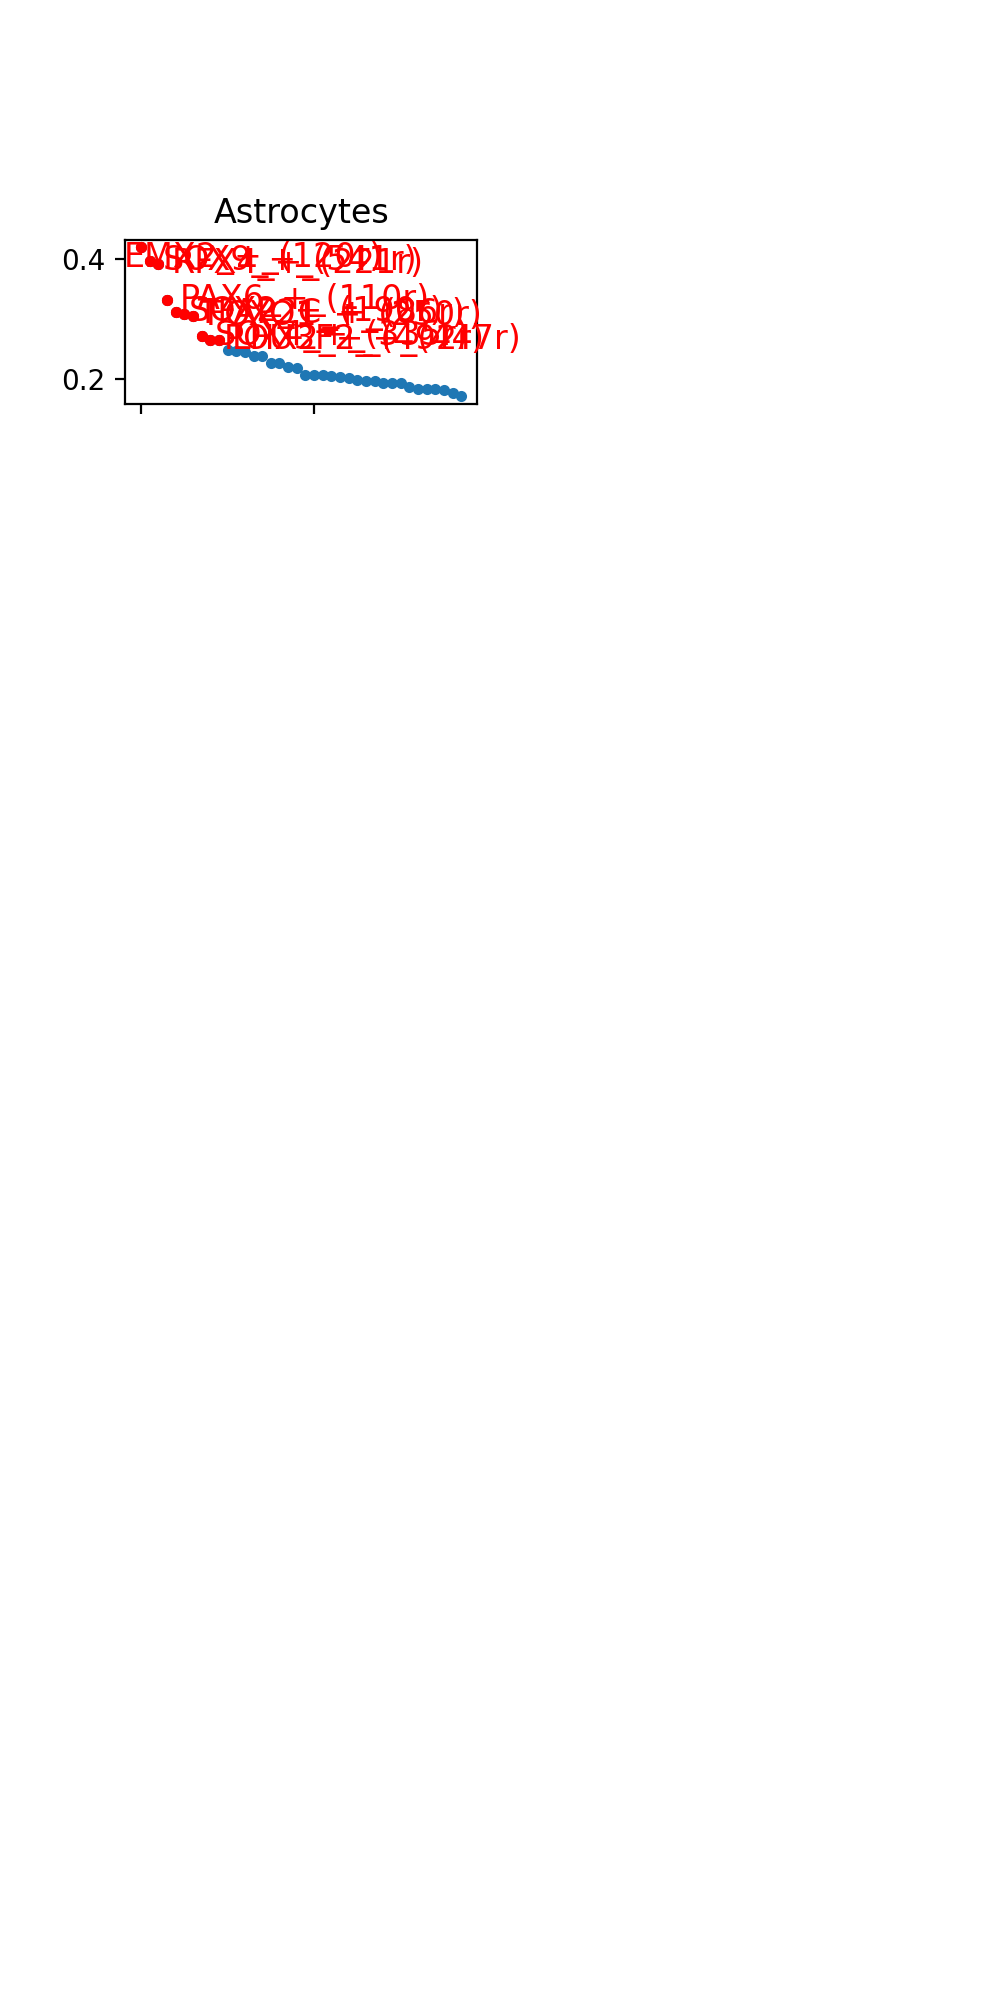

In [64]:
plot_rss(scplus_obj, 'GEX_celltype_filtered', num_columns=2, top_n=10, figsize = (5, 10))

In [69]:
# I NEED TO UPDATE THE SCENICPLUS PACKAGE. PROBABLY THERE ARE SOME COMPATIBILITY ISSUES WITH THE DEPENDENCY PACKAGES.

import inspect
from scenicplus.RSS import plot_rss

# Use inspect.getsource() to access the source code of plot_rss
source_code = inspect.getsource(plot_rss)

# Print the source code
print(source_code)


def plot_rss(scplus_obj: SCENICPLUS,
             rss_key: str,
             top_n: Optional[int] = 5,
             selected_groups: Optional[List[str]] = None,
             num_columns: Optional[int] = 1,
             figsize: Optional[Tuple[float, float]] = (6.4, 4.8),
             fontsize: Optional[int] = 12,
             save: str = None):
    """
    Plot RSS values per group

    Parameters
    ---------
    scplus_obj: `class::SCENICPLUS`
        A SCENICPLUS object with eRegulons AUC computed.
    rss_key: str, optional
        Key to extract RSS values from.
    top_n: int, optional
        Number of top eRegulons to highlight.
    selected_groups: List, optional
        Groups to plot. Default: None (all)
    num_columns: int, optional
        Number of columns for multiplotting
    figsize: tuple, optional
        Size of the figure. If num_columns is 1, this is the size for each figure; if num_columns is above 1, this is the overall size of the figure (if keeping
        d

In [65]:
# Next we select the top 10 eRegulons per cell type:

In [66]:
flat_list = lambda t: [item for sublist in t for item in sublist]
selected_markers = list(set(flat_list(
    [scplus_obj.uns['RSS']['GEX_celltype_filtered'].loc[celltype].sort_values(ascending = False).head(10).index.to_list()
    for celltype in scplus_obj.uns['RSS']['GEX_celltype_filtered'].index])))

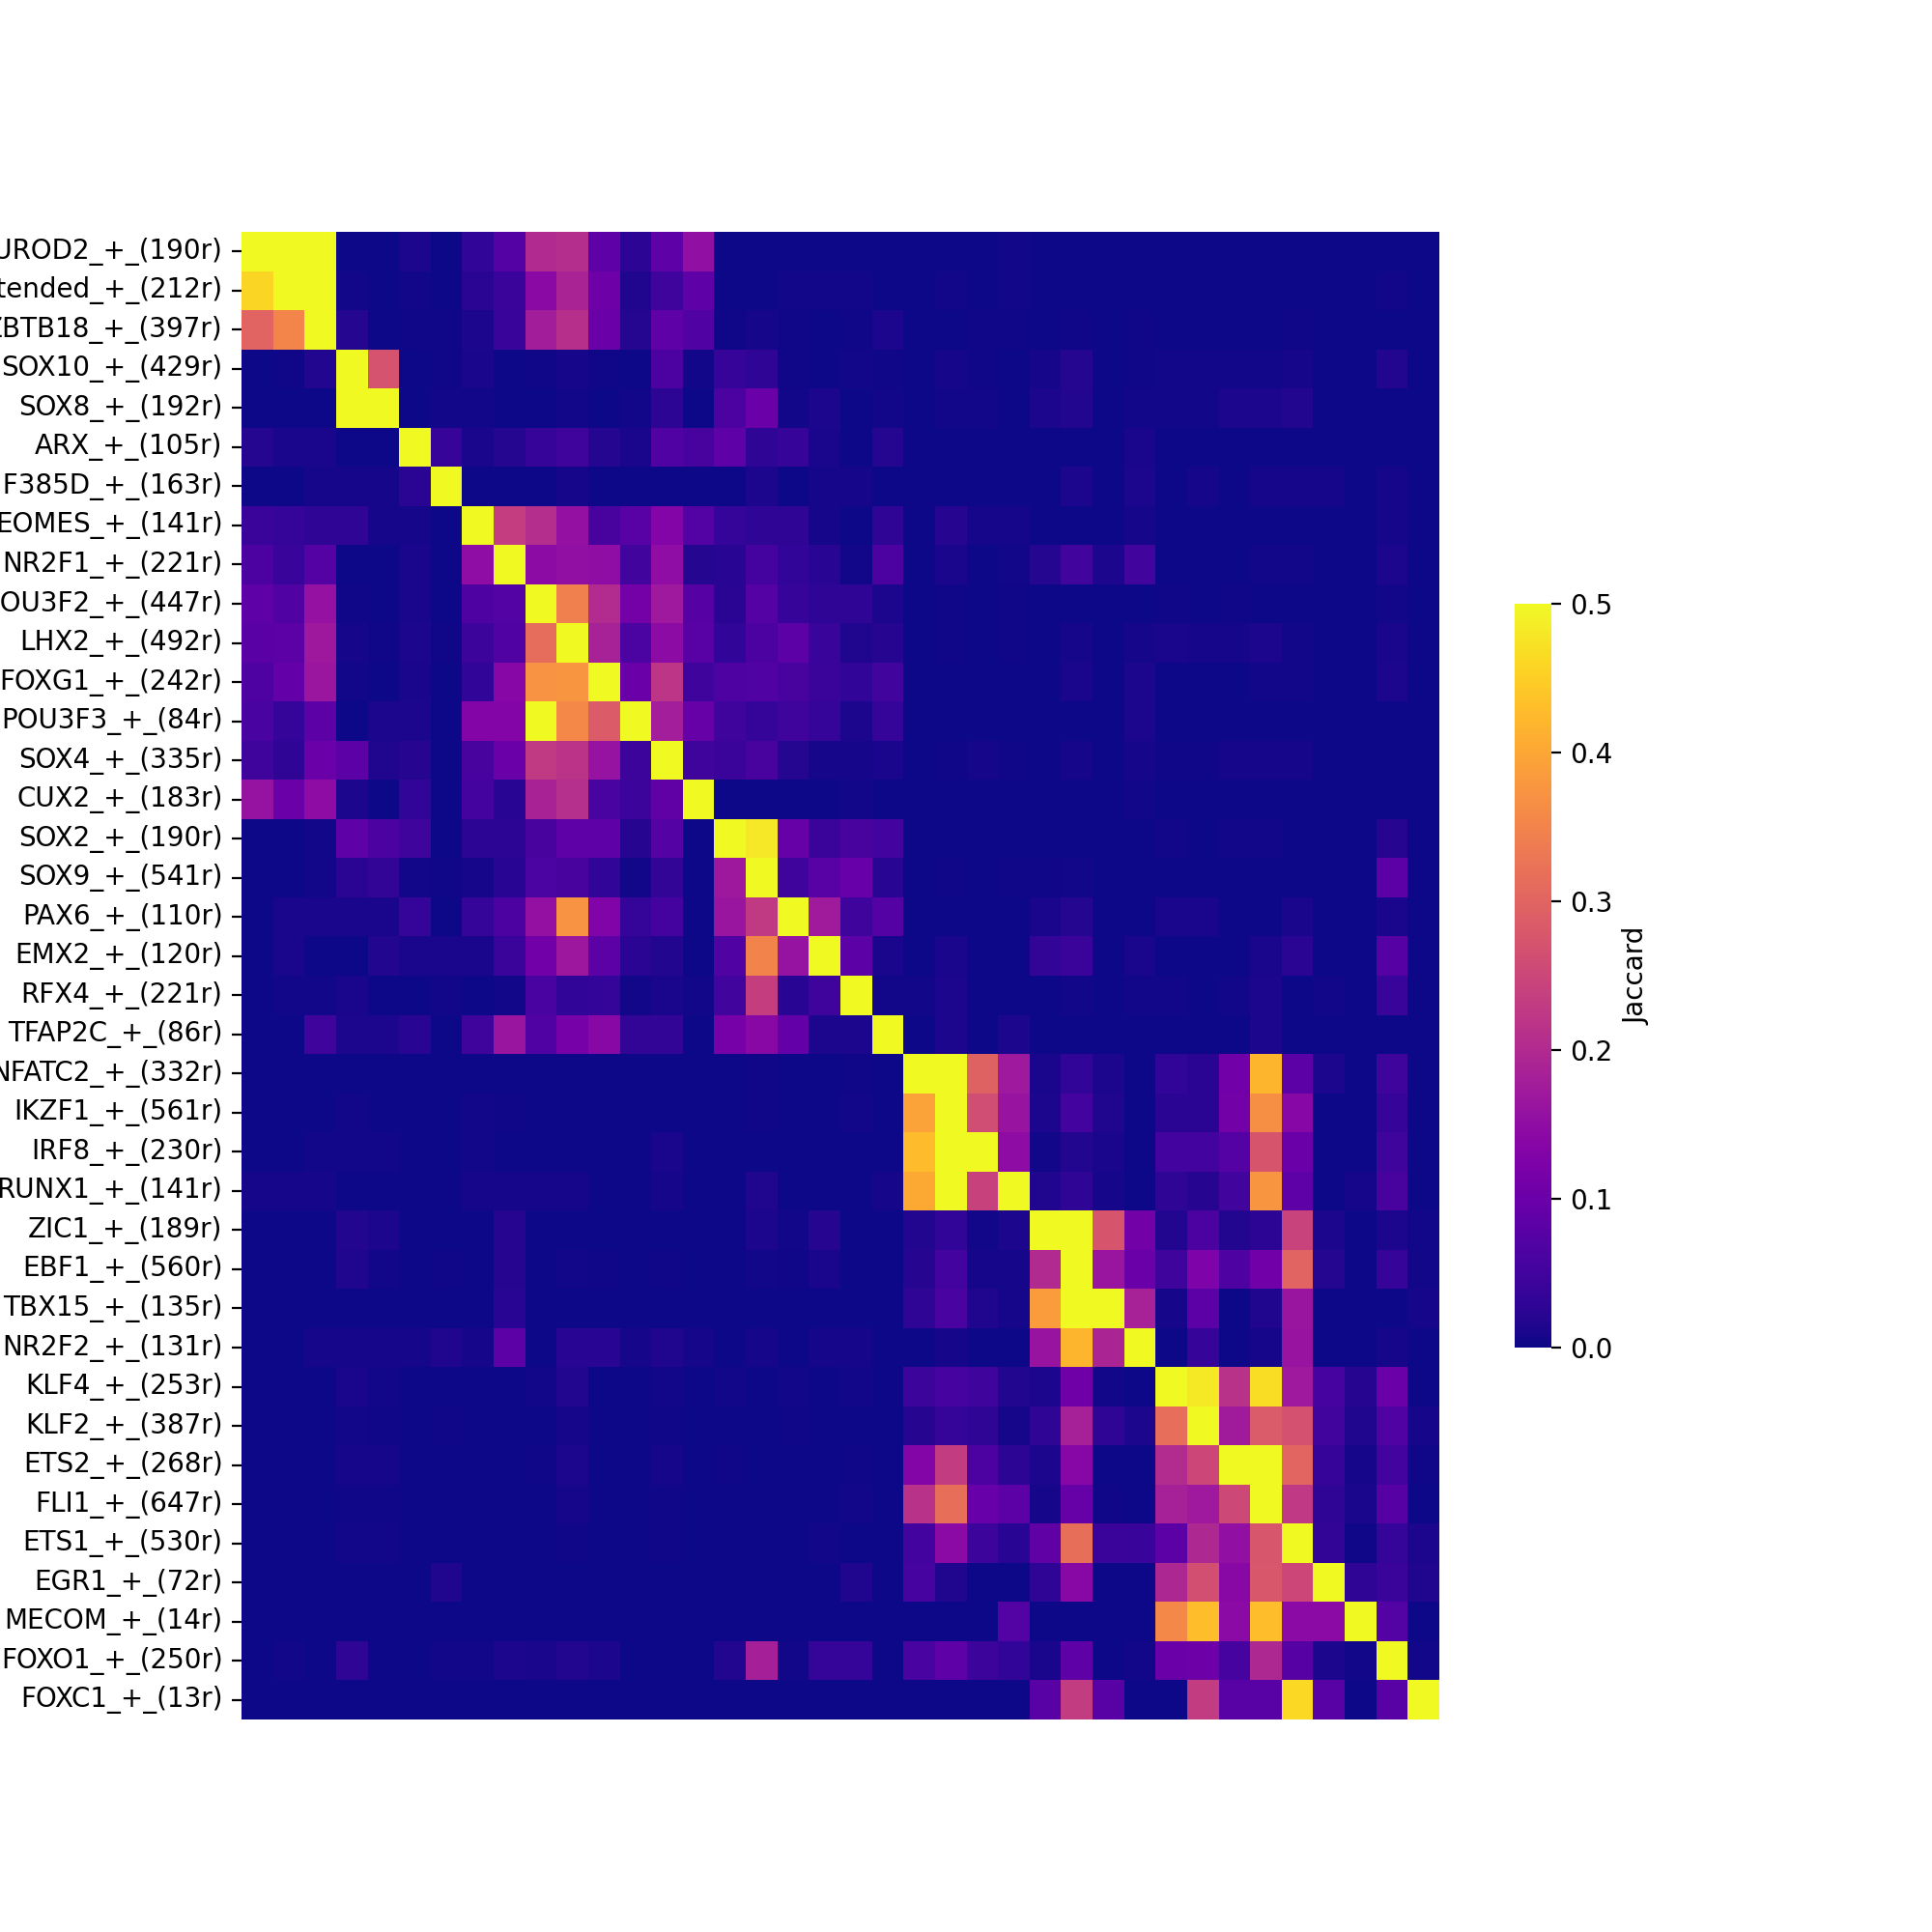

In [67]:
from scenicplus.plotting.correlation_plot import *

region_intersetc_data, Z = jaccard_heatmap(
        scplus_obj,
        method = 'intersect',
        gene_or_region_based = 'Region_based',
        use_plotly = False,
        selected_regulons = selected_markers,
        signature_key = 'eRegulon_signatures_filtered',
        figsize = (10, 10), return_data = True, vmax = 0.5, cmap = 'plasma')

In [70]:
# Plotting a network:

# eRegulons can also be visualized in a network. Simple plots can be made using python. For more complicated plots (i.e. containing many nodes and edges) we suggest exporting your network to cytoscape.

# Let’s create a very simple network for B cells. We will use the top 1000 highly variable regions and genes in this plot. If you want to use more feautures please export your nework to cytoscape.

In [71]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj.to_df('ACC').loc[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Region']))], n_top_features=1000, plot = False)
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata_filtered']['Gene']))].T, n_top_features=1000, plot = False)

2024-03-24 17:08:04,839 cisTopic     INFO     Calculating mean
2024-03-24 17:08:04,899 cisTopic     INFO     Calculating variance
2024-03-24 17:08:05,454 cisTopic     INFO     Done!
2024-03-24 17:08:05,582 cisTopic     INFO     Calculating mean
2024-03-24 17:08:05,603 cisTopic     INFO     Calculating variance
2024-03-24 17:08:05,763 cisTopic     INFO     Done!


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# First we format the eRegulons into a table which can be used to create a network using the package networkx:

In [76]:
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['MECOM', 'KLF4', 'FOXO1'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['GEX_celltype'])

/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/ykazci/miniconda3/envs/scenicplus/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.


In [77]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'MECOM': 'Orange', 'KLF4': 'Purple', 'FOXO1': 'Red'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'MECOM': 'Orange', 'KLF4': 'Purple', 'FOXO1': 'Red'}},
                                    'Gene': {'variable': 'GEX_celltype_Log2FC_Endothelial', 'continuous_color' : 'bwr'},
                                    'Region': {'variable': 'GEX_celltype_Log2FC_Endothelial', 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : 'GEX_celltype_Log2FC_Endothelial', 'min_alpha': 0.1},
                                    'Gene': {'variable' : 'GEX_celltype_Log2FC_Endothelial', 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 10.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

In [ ]:
# Finally we can visualize the network:

# In this network diamond shapes represent regions and they are color coded by their log2fc value in B cells target genes and TFs are visualized using circles and are labeled.

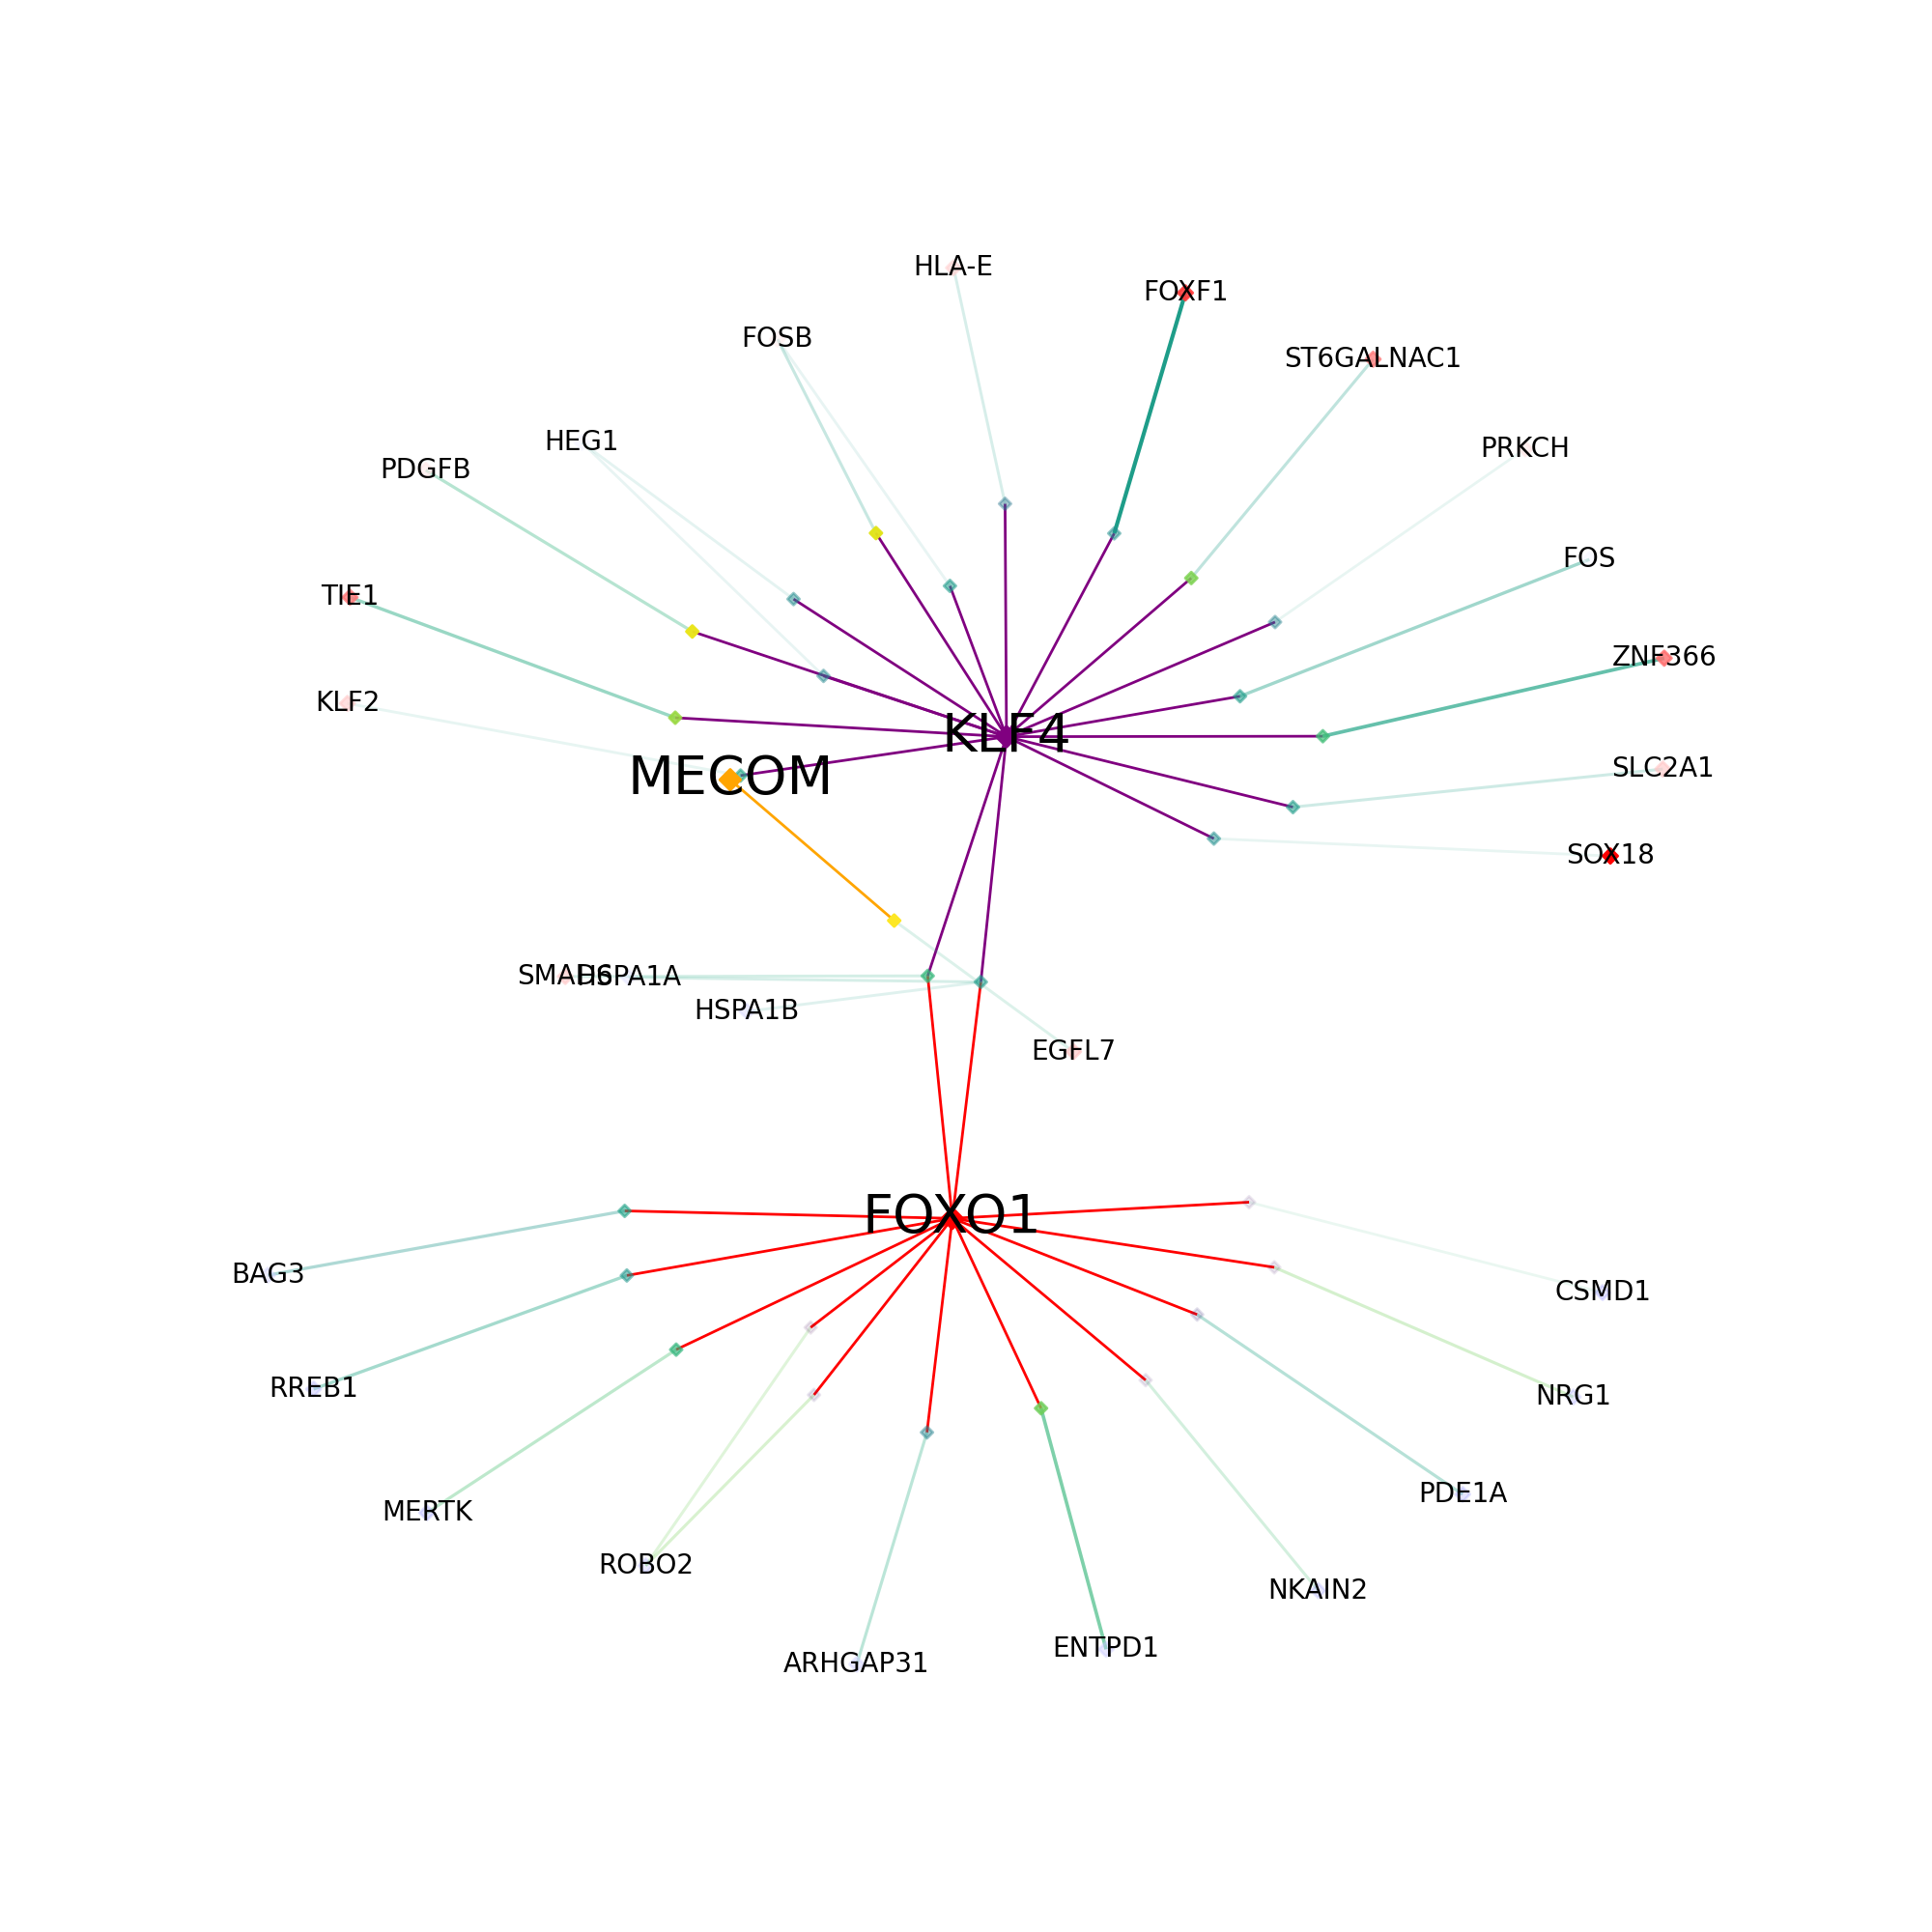

In [78]:
plt.figure(figsize=(10,10))
plot_networkx(G, pos)

In [ ]:
# We can also export this network to a format which can be opened in Cytoscape.

In [79]:
export_to_cytoscape(G, pos, out_file = os.path.join('scenicplus_w_cluster', 'network_Endothelial.cys'))

In [ ]:
# This network can be imported using file -> import -> Network from file ...

# Also make sure to import the SCENIC+ network layout using file -> import -> Styles from file ....

# This layout is available under cytoscape_styles/SCENIC+.xml.

In [80]:
import session_info

In [81]:
session_info.show()